In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Splitting the dataset into train and test

In [2]:
import glob
import numpy as np

## classes or target to be predicted
* 4 target class that our model needs to predict according to kaggle dataset are:
* covid
* lung opacity
* normal
* viral pnuemonia

In [3]:
classes = ['covid','lung_opacity','normal','viral_pneumonia']

## Defining one function named plot_image to plot images corres to class name of image

In [4]:
def plot_image(X,y,index):
    plt.figure(figsize=(5,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

## Reading dataset from folder COVID-19_Radiography
* Used glob function to read the files matching with specified pattern
* taken two list i.e, one data and another labels
* In data list x-ray image of every class will be added
* In labels list label for each class i.e, for covid '0', lung_opacity '1' , normal '2' and viral_pueumonia '3' are the labels.
* for loading images , keras api is used .for reference see link: https://docs.w3cub.com/tensorflow~2.3/keras/preprocessing/image/load_img.html
* dataset is spiltted in train and test set using train_test_split

In [5]:
covid = glob.glob('COVID-19_Radiography_Dataset/COVID/*.*')
lung_opacity = glob.glob('COVID-19_Radiography_Dataset/Lung_Opacity/*.*')
normal = glob.glob('COVID-19_Radiography_Dataset/Normal/*.*')
viral_pneumonia = glob.glob('COVID-19_Radiography_Dataset/Viral Pneumonia/*.*')

data = []
labels = []

for i in covid:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in lung_opacity:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in normal:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in viral_pneumonia:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [6]:
X_train.shape,X_test.shape,ytrain.shape,ytest.shape

((16932, 280, 280, 3), (4233, 280, 280, 3), (16932,), (4233,))

In [7]:
ytrain[0:5]

array([1, 2, 2, 2, 2])

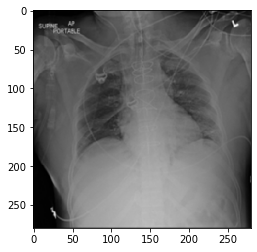

In [8]:
plt.imshow(X_train[3])

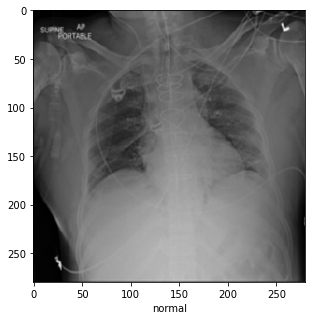

In [9]:
plot_image(X_train,ytrain,3)

In [10]:
print(ytrain[3])

2


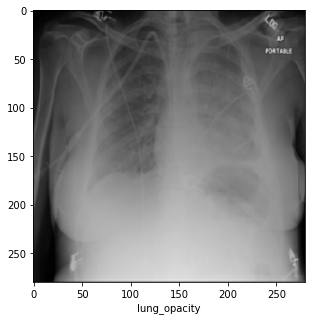

In [11]:
plot_image(X_train,ytrain,13)

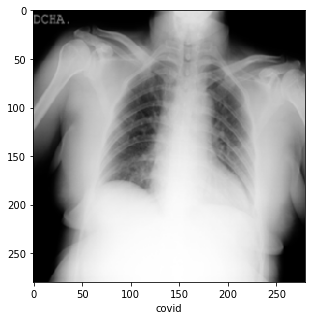

In [12]:
plot_image(X_train,ytrain,289)

## Constructing CNN
* using Sequential() model
* Convolution layers : first , using 32 filters having size 3 by 3
* Max Pooling Layers : size of filter is 2 by 2
* This convolution-pooling layer pair is repeated thrice as an approach to extract more features in image data.
* All layers in the neural network above (except the very last one) are using ReLU activation function.
* The output layer of this network consists of 4 neurons with sigmoid activation function. The reason is because in this classification task we got 4 different classes in which each of those is represented by each neuron in that layer.

In [13]:
cnn = keras.Sequential([
      keras.layers.Conv2D(32,(3,3),input_shape=(280,280,3),activation='relu'),
      keras.layers.MaxPool2D(2,2),
      
      keras.layers.Conv2D(128,(3,3),input_shape=(280,280,3),activation='relu'),
      keras.layers.MaxPool2D(2,2),
    
      keras.layers.Conv2D(512,(3,3),input_shape=(280,280,3),activation='relu'),
      keras.layers.MaxPool2D(2,2),
    
      keras.layers.Conv2D(512,(3,3),input_shape=(280,280,3),activation='relu'),
      keras.layers.MaxPool2D(2,2),
      
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(4, activation='softmax') 
      
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 278, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 139, 139, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 137, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 68, 68, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 512)      0

## Training a network and Optimization Algorithm
* When we train a model, we're basically trying to solve an optimization problem.
* We're trying to optimize the weights within the model.
* Our task is to find the weights that most accurately map our input data to the correct output class. 
* This mapping is what the network must learn.
* The weights are optimized using what we call an optimization algorithm.
* The optimization process depends on the chosen optimization algorithm.
* We also use the term optimizer to refer to the chosen algorithm.

In [14]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## Fitting the model
* At the end of each epoch during the training process, the loss will be calculated using the network's 
output predictions and the true labels for the respective input.

* Suppose our model is classifying images of cats and dogs, and assume that the label for cat is 0 and the label for dog is 1.
 
* Now suppose we pass an image of a cat to the model, and the provided output is 0.25 . 
* In this case, the difference between the model's prediction and the true label is 0.25 - 0 =0.25 .
* This difference is also called the error.

* This process is performed for every output. For each epoch, the error is accumulated across all the individual outputs.
* In neural network programming, the loss function is what an optimizer is attempting to minimize by iteratively updating the weights inside the network.

In [15]:
cnn.fit(X_train,ytrain,epochs=15)

Epoch 1/15
530/530 [==============================] - 2024s 4s/step - loss: 7.0147 - accuracy: 0.7079
Epoch 2/15
530/530 [==============================] - 2060s 4s/step - loss: 0.5078 - accuracy: 0.7999
Epoch 3/15
530/530 [==============================] - 1670s 3s/step - loss: 0.4343 - accuracy: 0.8306
Epoch 4/15
530/530 [==============================] - 3022s 6s/step - loss: 0.3786 - accuracy: 0.8521
Epoch 5/15
530/530 [==============================] - 10664s 20s/step - loss: 0.3253 - accuracy: 0.8730
Epoch 6/15
530/530 [==============================] - 2045s 4s/step - loss: 0.3098 - accuracy: 0.8844
Epoch 7/15
530/530 [==============================] - 1686s 3s/step - loss: 0.2550 - accuracy: 0.9012
Epoch 8/15
530/530 [==============================] - 1675s 3s/step - loss: 0.2267 - accuracy: 0.9131
Epoch 9/15
530/530 [==============================] - 6044s 11s/step - loss: 0.2217 - accuracy: 0.9131
Epoch 10/15
530/530 [==============================] - 1646s 3s/step - loss: 0.

## Results 
* From above we can see that acuracy of model on training data comes out to be 95.88%

## Saving the model

In [16]:
cnn.save("covid_classifier.h6")
print("model saved to disk")

INFO:tensorflow:Assets written to: covid_classifier.h6\assets
model saved to disk


## Evaluating the test data with model

In [17]:
cnn.evaluate(X_test, ytest)

133/133 [==============================] - 120s 898ms/step - loss: 0.6457 - accuracy: 0.8382


[0.6457457542419434, 0.8381762504577637]

## Predicting the test dataset

In [18]:
y_preds = cnn.predict(X_test)

In [19]:
y_preds[0]

array([1.3335989e-05, 9.6263693e-06, 1.7081156e-02, 9.8289597e-01],
      dtype=float32)

In [20]:
y_preds_labels =[np.argmax(i) for i in y_preds]

In [21]:
## predicting test dataset with image with index 3
y_preds_labels[3]

2

In [22]:
## predicting class of image(test dataset) with index 3
classes[y_preds_labels[3]]

'normal'

In [23]:
## Actual class of image(test dataset) with index 3
classes[ytest[3]]

'normal'

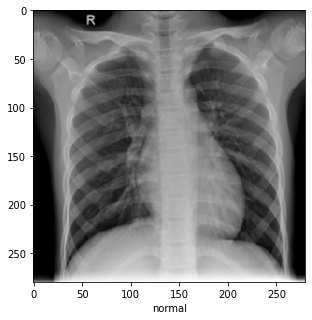

In [24]:
plot_image(X_test,ytest,3)

In [25]:
## predicting test dataset with image with index 3
y_preds_labels[13]

0

In [26]:
## predicting class of image(test dataset) with index 3
classes[y_preds_labels[13]]

'covid'

In [27]:
## actual class of image(test dataset) with index 3
classes[ytest[13]]

'covid'

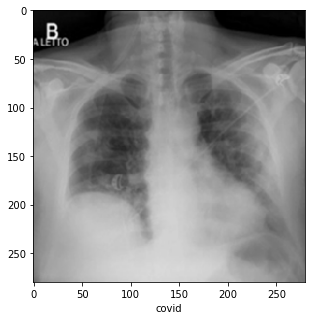

In [28]:
plot_image(X_test,ytest,13)

## Conclusions And Discussions

## Confusion Matrix And Classification Report

* From evalutaing the model with test set we can see that accuracy(on test dataset)comes out to be 83.96%.
* From the below confusion matrix we can observe the following results:
* 66 number of covid X-ray images were predicted to be normal.
* 34 number of covid x-ray imgaes were predicted to be lung_opacity(i.e., some issue/disease in lungs other then viral pneumonia)
* 4 covid x-ray images were predicted to be viral pneumonia
* 55 lung opacity x-ray images were predicted by model as having covid 
* 237 lung opacity x-ray images were predicted as normal lung by model
* 3 lung opacity x-ray images were predicted as having viral pneumonia
* 56 normal lung were predicted as having covid by the model
* 276 normal lung were predicted as having some disease in lung (lung opacity)
* 17 normal lung were predicted to having viral pnuemonia
* 2 x-ray images having viral pnuemonia were predicted to have covid
* 22 x-ray images having viral pnuemonia were predicted to be normal lung
* Model gave most accurate prediction in case of viral pnuemonia and lung opacity

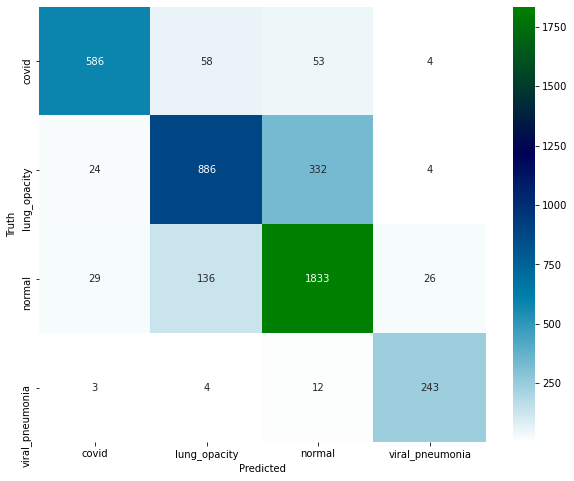

In [29]:
import seaborn as sns
plt.figure(figsize=(10,8))
cn = tf.math.confusion_matrix(ytest,y_preds_labels)
sns.heatmap(cn,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='ocean_r')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [30]:
from sklearn.metrics import classification_report

print(f'classificaton report \n {classification_report(ytest,y_preds_labels)}')

classificaton report 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       701
           1       0.82      0.71      0.76      1246
           2       0.82      0.91      0.86      2024
           3       0.88      0.93      0.90       262

    accuracy                           0.84      4233
   macro avg       0.86      0.85      0.85      4233
weighted avg       0.84      0.84      0.84      4233

